<a href="https://colab.research.google.com/github/brytlao/Practical_computer_vision/blob/master/CHAPTER_05_Convolutional_Neural_Networks_Part_2_of_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 05: Convolutional Neural Networks (Part 2 of 2)**

Continuation of Chapter 05. Implementation of CNN methods. tensorflow.keras conventions were used for cleaner code.

# **Datasets and libraries required**

In [1]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (1.0.1)


In [2]:
# tensorflow dataset
import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

# helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

# print tf version
print(tf.__version__)

# tf issue
tf.enable_eager_execution()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

1.13.1


# **CNN in practice**

**Fashion MNIST**

Import data

In [3]:
dataset, metadata = tfds.load("fashion_mnist", as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

# explore imported data
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("number of training samples: {}".format(num_train_examples))
print("number of test samples: {}".format(num_test_examples))

number of training samples: 60000
number of test samples: 10000


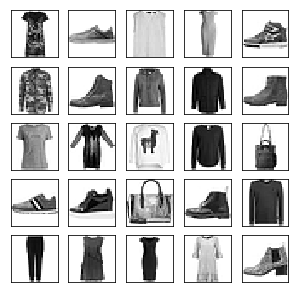

In [4]:
plt.figure(figsize=(5,5))
i = 0
for image,label in train_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image,cmap=plt.cm.binary)
  i += 1
plt.show()

Prepare data

In [0]:
# image normalizing function
def normalize(images,labels):
  images = tf.cast(images,tf.float32)
  images /= 255
  return images,labels

In [0]:
# normalize images
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

Build model

In [7]:
# input parameters
img_h = 28
img_w = 28

# create layers
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding="same",
                           activation=tf.nn.relu,
                           use_bias=False,
                           input_shape=(img_h,img_w,1)),
    tf.keras.layers.Conv2D(32,(3,3),padding="same",
                           activation=tf.nn.relu,
                           use_bias=False),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64,(3,3),padding="same",
                           activation=tf.nn.relu,
                           use_bias=False),
    tf.keras.layers.Conv2D(64,(3,3),padding="same",
                           activation=tf.nn.relu,
                           use_bias=False),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(128,(3,3),padding="same",
                           activation=tf.nn.relu,
                           use_bias=False),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        288       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18432     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36864     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         73728     
__________

In [8]:
# set iteration behavior
batch_sz = 32
num_epochs = 5
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(batch_sz)
test_dataset = test_dataset.batch(batch_sz)

# fit model to data
model.fit(train_dataset,
          epochs=num_epochs,
          steps_per_epoch=math.ceil(num_train_examples/batch_sz))

Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4144 - acc: 0.8489
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2484 - acc: 0.9111
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2064 - acc: 0.9245
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1728 - acc: 0.9383
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1473 - acc: 0.9466


In [9]:
# evaluate and print accuracy
batch_sz = 32
test_loss,test_accuracy = model.evaluate(test_dataset,
                                         steps=math.ceil(num_test_examples/batch_sz))
print("test lost: {}".format(test_loss))
print("test accuracy: {}".format(test_accuracy))

313/313 [==============================] - 2s 8ms/step - loss: 0.2407 - acc: 0.9185
test lost: 0.24067275654584075
test accuracy: 0.9185000061988831


# **Popular CNN architectures**

**VGGNet**

In [0]:
# get model
vggnet_model = tf.keras.applications.VGG16(weights='imagenet')

# uncomment to see model structure
#vggnet_model.summary()

**Inception models**

In [0]:
# get model
inception_model = tf.keras.applications.InceptionV3(weights='imagenet')

# uncomment to see model structure
#inception_model.summary()

**ResNet**

Upload image for prediction

In [0]:
# import additional dependencies
import cv2
import time
import tensorflow.keras.applications.resnet50 as rn50

In [13]:
# upload file using explorer
from google.colab import files
uploaded = files.upload()
for k, v in uploaded.items():
  open(k, 'wb').write(v)
img_name = list(uploaded)[0]

# read an image from file
img = cv2.imread(img_name)

Saving train.png to train.png


In [0]:
# plotting function considering gray images:
def plot_cv_img(ax,input_image,img_title,is_gray=False):
    """
    Check if an image is to be displayed gray
    Convert an image from BGR to RGB then plot
    """
    # change color channel
    if not is_gray:
      ax.imshow(cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB))
    else:
      ax.imshow(input_image,cmap='gray')
      
    # turn off axes
    ax.axis('off')

    # set title
    ax.set_title(img_title)

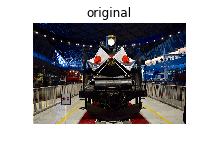

In [15]:
# set figure params
FIG_WIDTH = 3
FIG_HEIGHT = 2
num_fig = 2
plt.figure(figsize=(FIG_WIDTH*num_fig,FIG_HEIGHT))

# display image
ax = plt.subplot(1,num_fig,1)
plot_cv_img(ax,img,'original',is_gray=False)

Preprocess image

In [0]:
# image preprocessing function
def preprocess_img(input_img):
  # opencv processing
  input_img = cv2.cvtColor(input_img,cv2.COLOR_BGR2RGB)
  input_img = cv2.resize(input_img,(224,224))
  input_img = input_img[np.newaxis,:,:,:]
  
  # convert to float type
  input_img = np.asarray(input_img,dtype=np.float)
  
  # imagenet-specific processing
  x = rn50.preprocess_input(input_img)
  
  return x

In [0]:
# preprocess image
input_x = preprocess_img(img)

Get model

In [18]:
# get model
resnet_model = tf.keras.applications.ResNet50(weights='imagenet')

# uncomment to see model structure
#resnet_model.summary()

102858752/102853048 [==============================] - 2s 0us/step


In [19]:
# run predictions
start = time.time()
preds = resnet_model.predict(input_x)
print(time.time()-start)

1.5673446655273438


In [20]:
# decode prediction, top 5
print("Predicted: {}".format(rn50.decode_predictions(preds,top=5)[0]))

40960/35363 [==================================] - 0s 2us/step
Predicted: [('n04310018', 'steam_locomotive', 0.38250124), ('n03895866', 'passenger_car', 0.31568438), ('n03599486', 'jinrikisha', 0.074664645), ('n02917067', 'bullet_train', 0.06794372), ('n04266014', 'space_shuttle', 0.041187987)]
